<a href="https://colab.research.google.com/github/rajuzumaki2207/Time_series_Sequence/blob/main/RUL_TurboFan/3_TurboFan_ARIMA_RUL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns



from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20,10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

## Import Data

In [6]:
## Train data and Test data
# define column names for easy indexing
index_names = ['id', 'cycles']
setting_names = ['op1', 'op2', 'op3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names
train = pd.read_csv("/content/drive/MyDrive/ML/Projects/RUL_TurboFan/train_FD001.txt", sep = "\s+", names=col_names)
test = pd.read_csv("/content/drive/MyDrive/ML/Projects/RUL_TurboFan/test_FD001.txt", sep = "\s+", names =col_names)
y_test = pd.read_csv('/content/drive/MyDrive/ML/Projects/RUL_TurboFan/RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])

In [8]:
def add_rul(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="id")
    max_cycle = grouped_by_unit["cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='id', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

In [9]:
## Add RUL
train = add_rul(train)

## Pre Processing

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


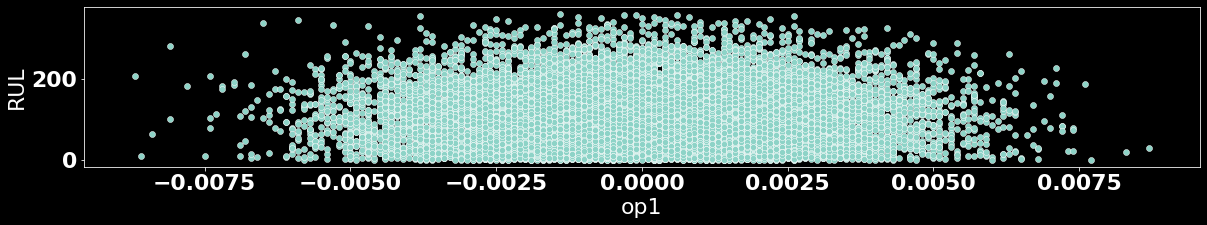

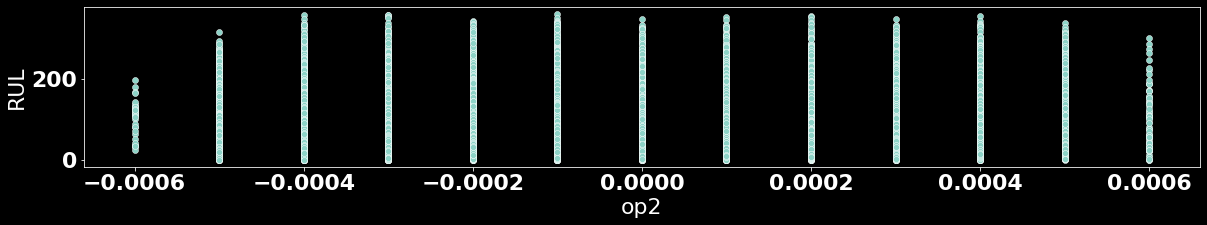

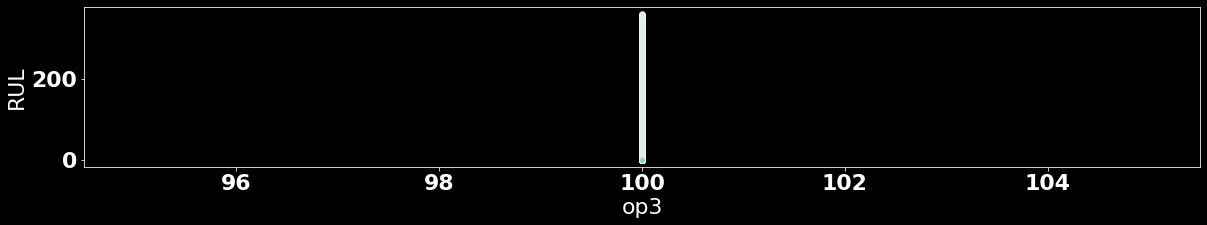

In [13]:
# Visulaize the setting Data
for i, op in enumerate(setting_names):
  
   plt.subplot(3,1,i+1)
   sns.scatterplot(data=train, x=op, y="RUL")
   plt.show()


In [15]:
len(sensor_names)

21

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


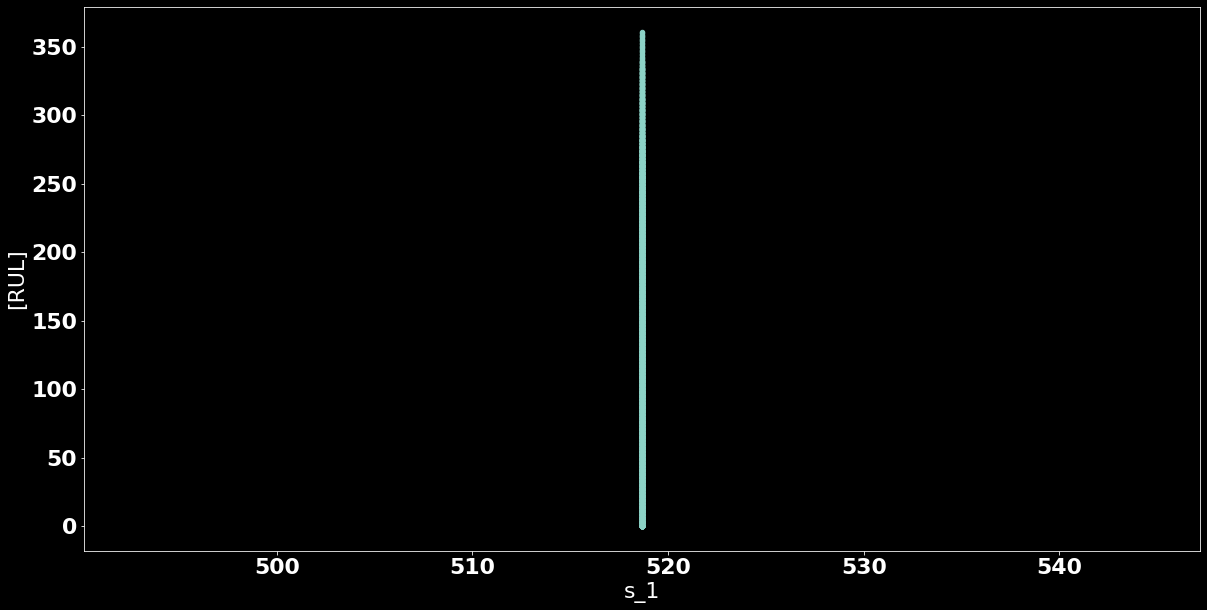

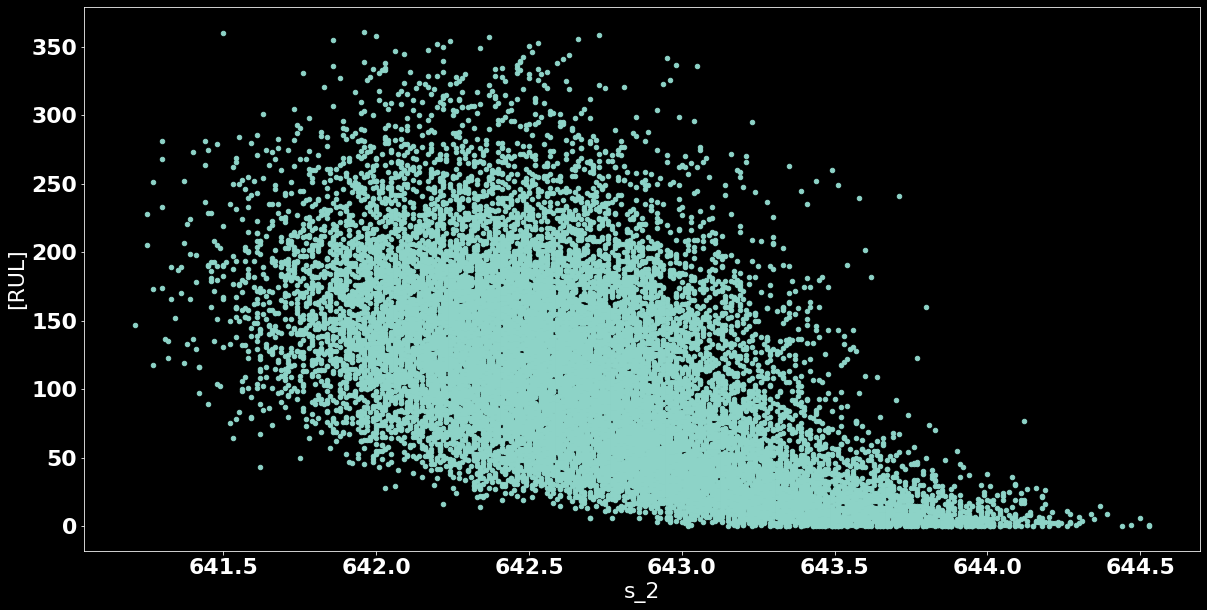

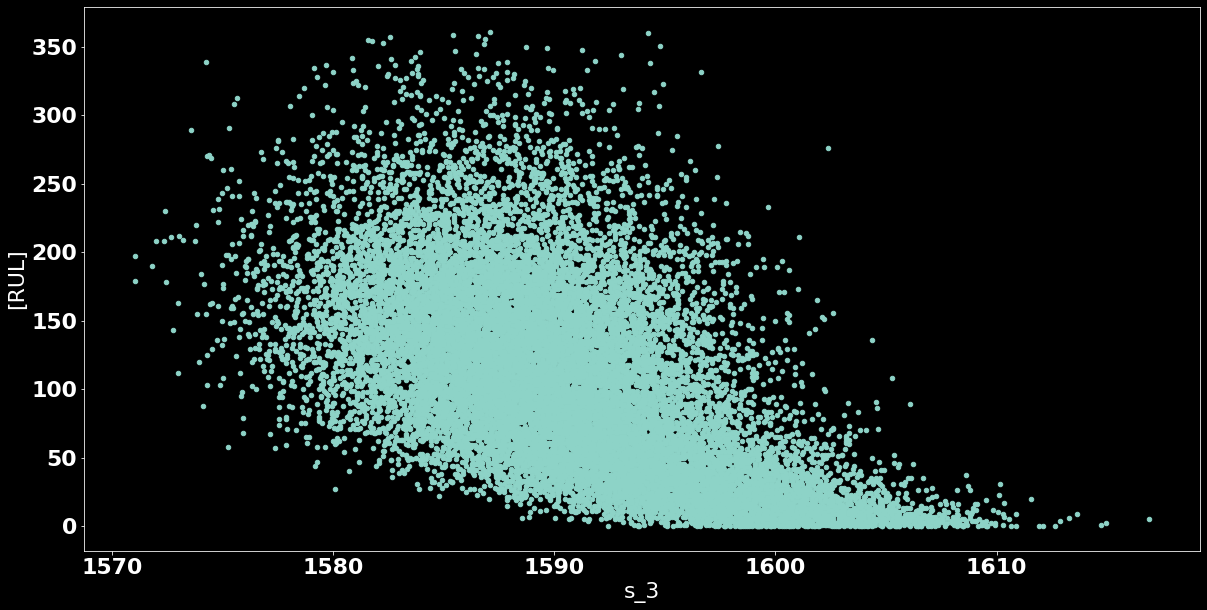

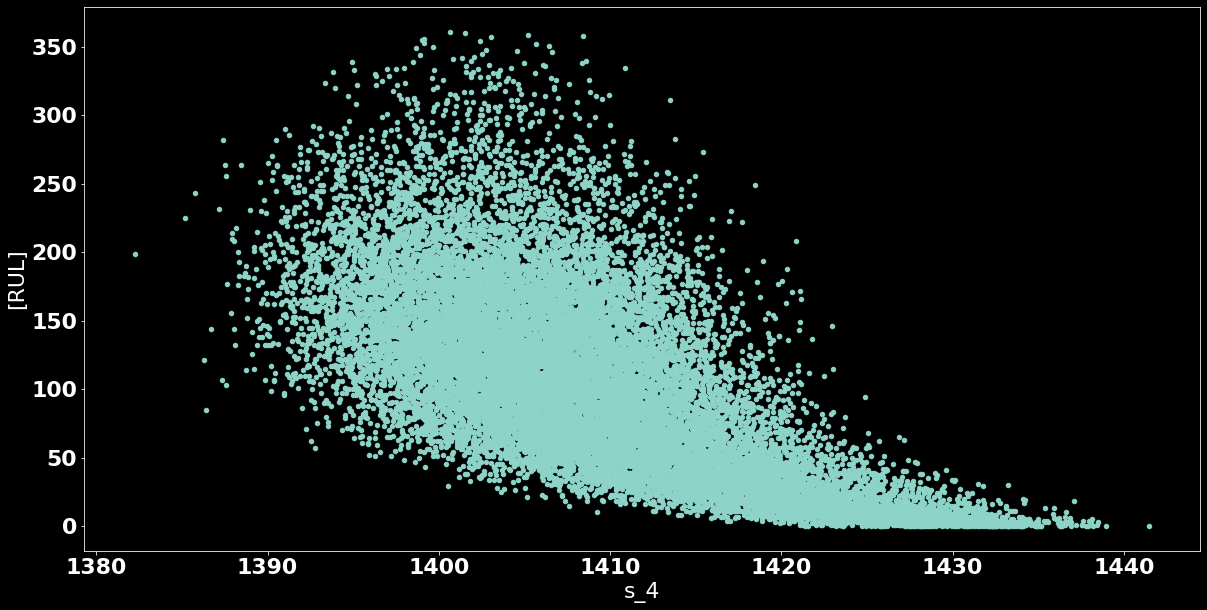

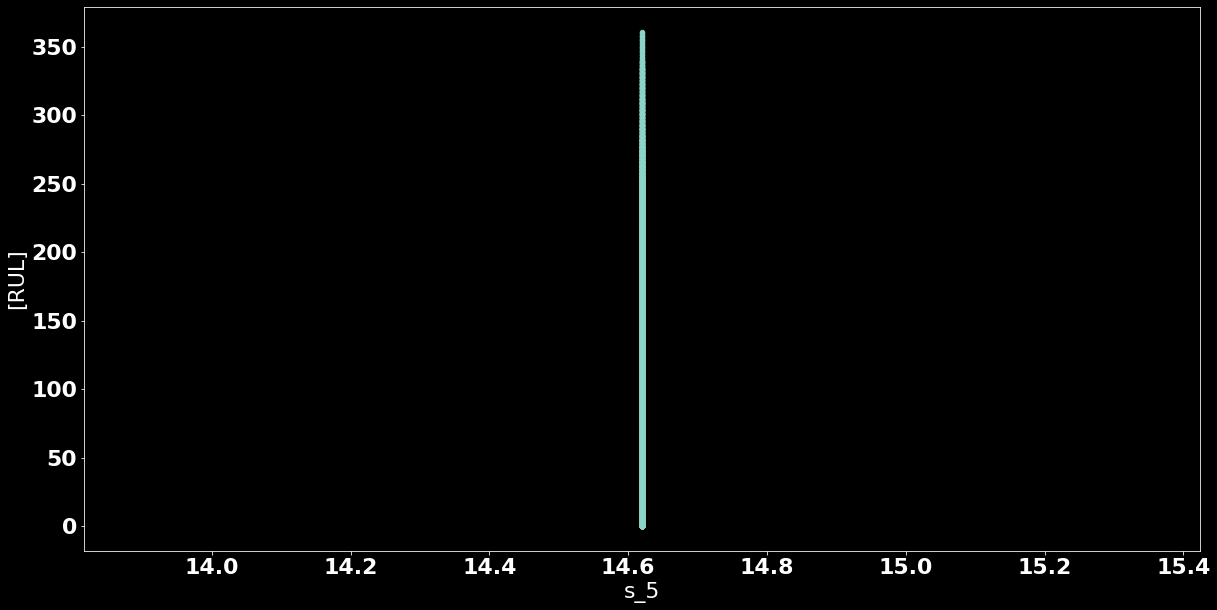

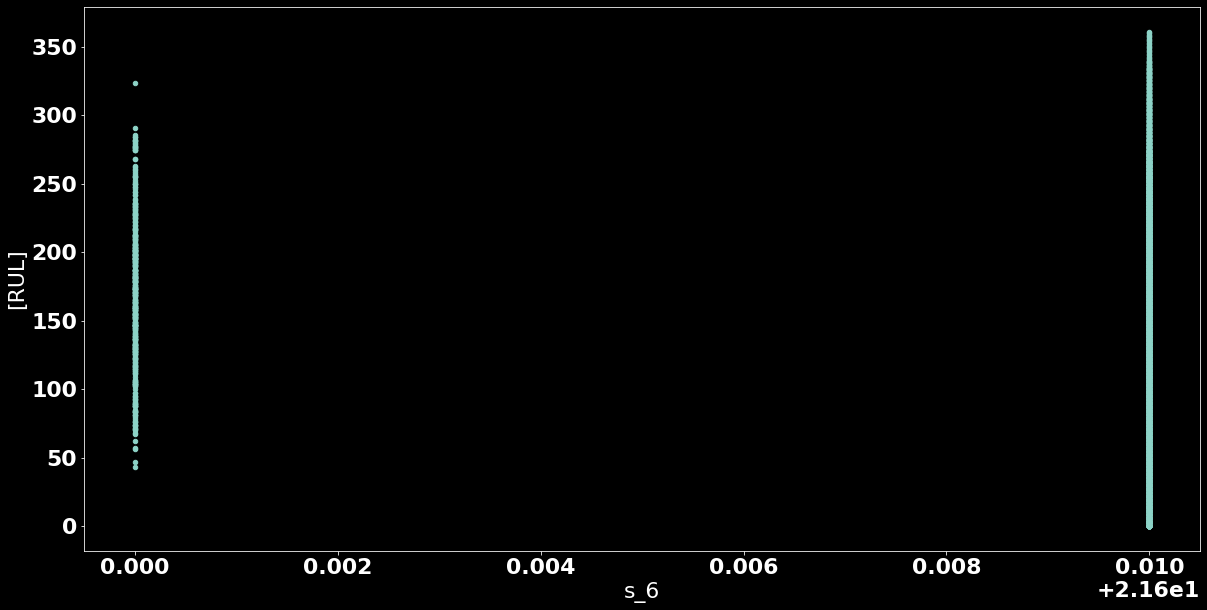

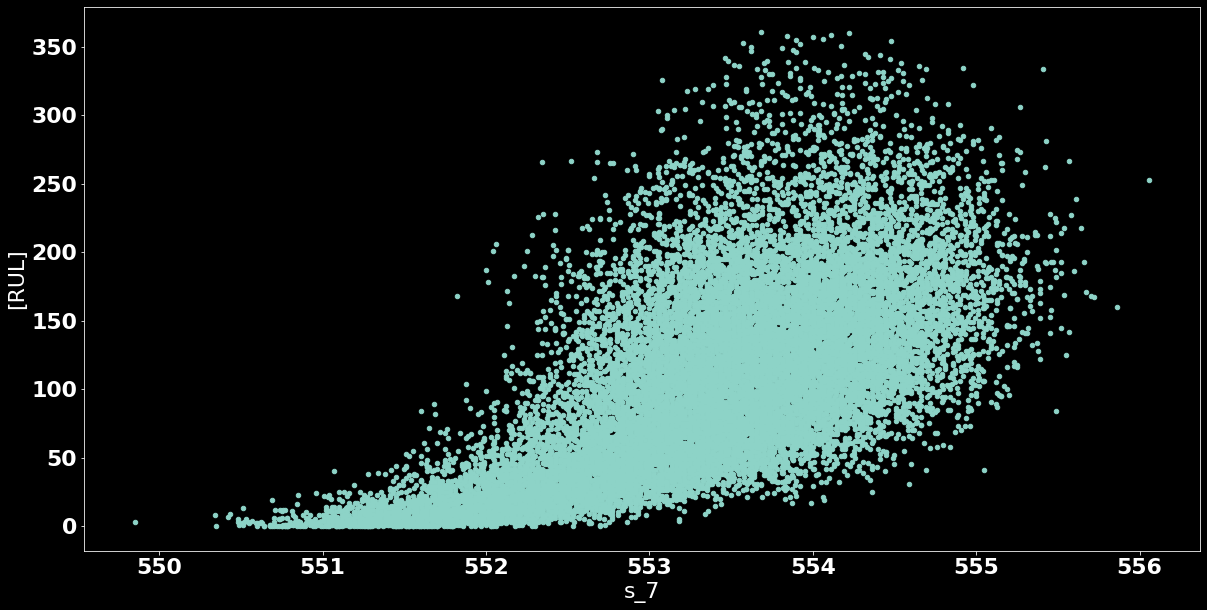

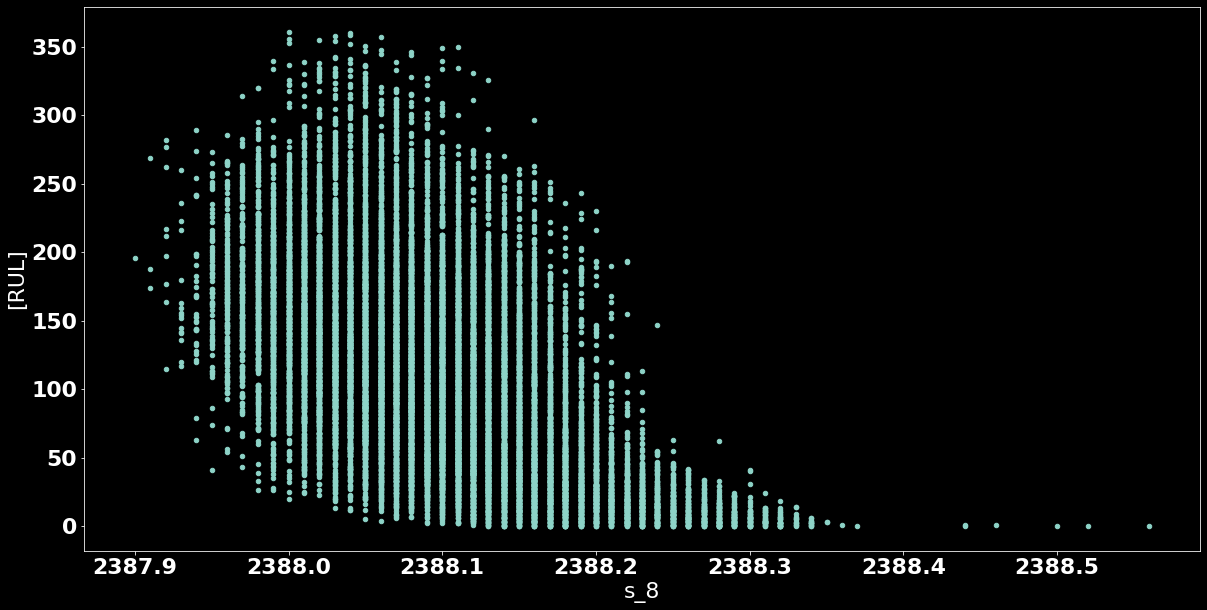

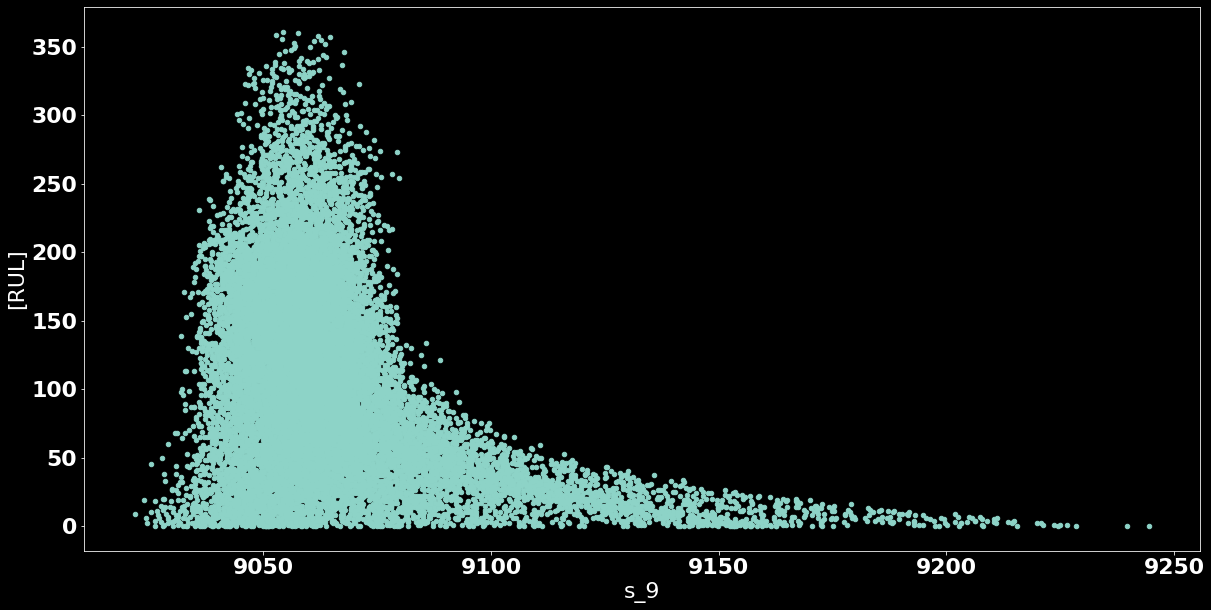

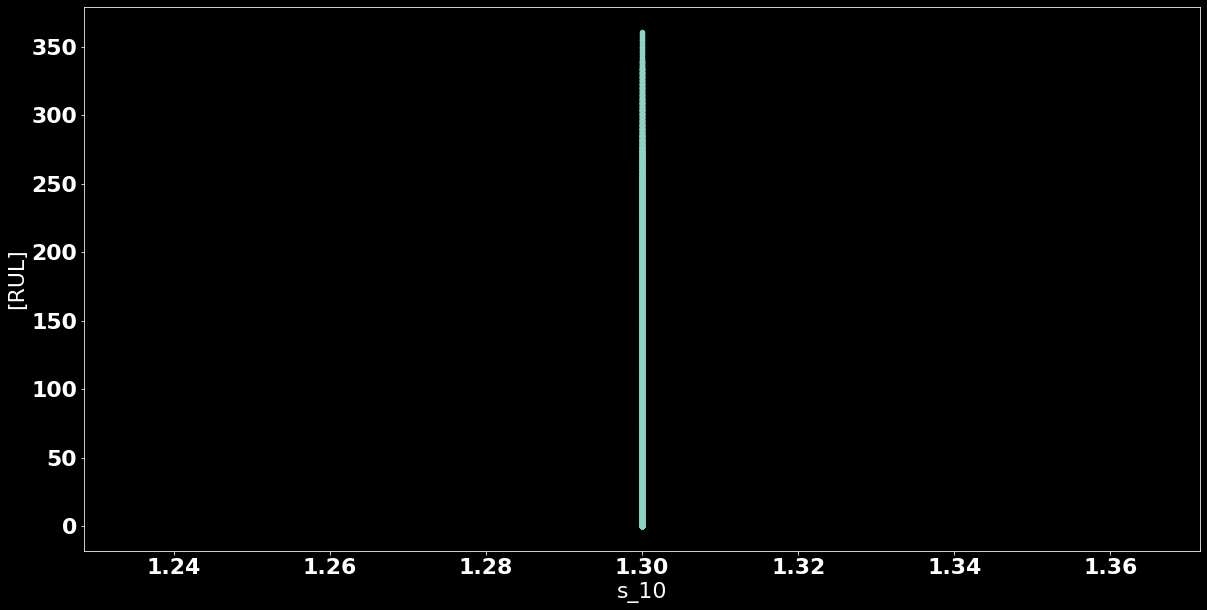

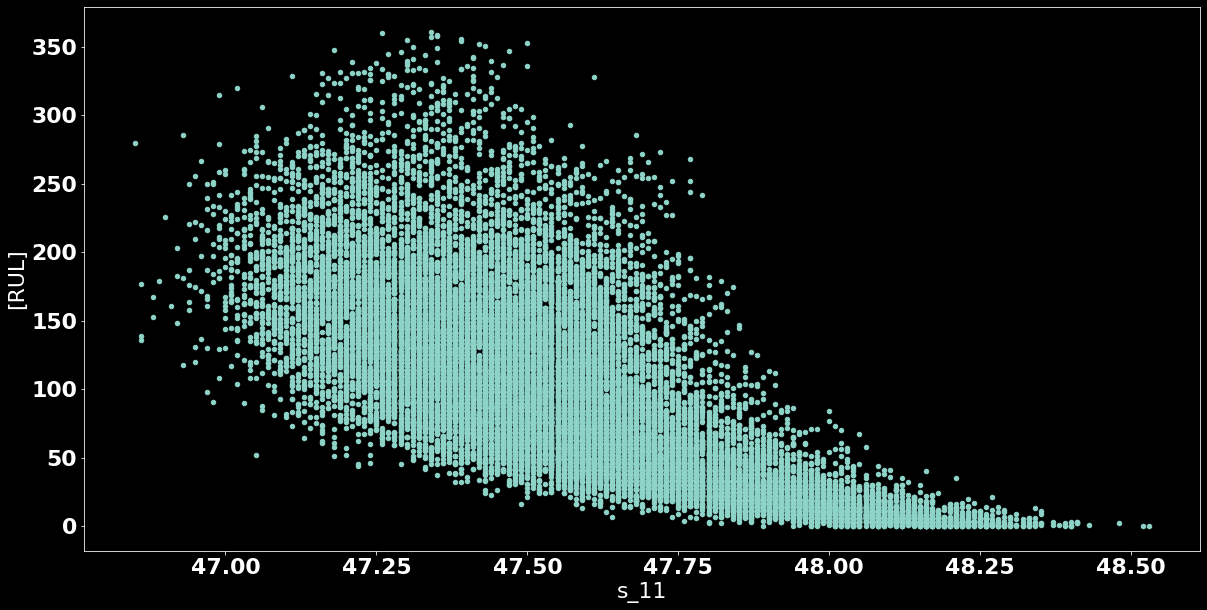

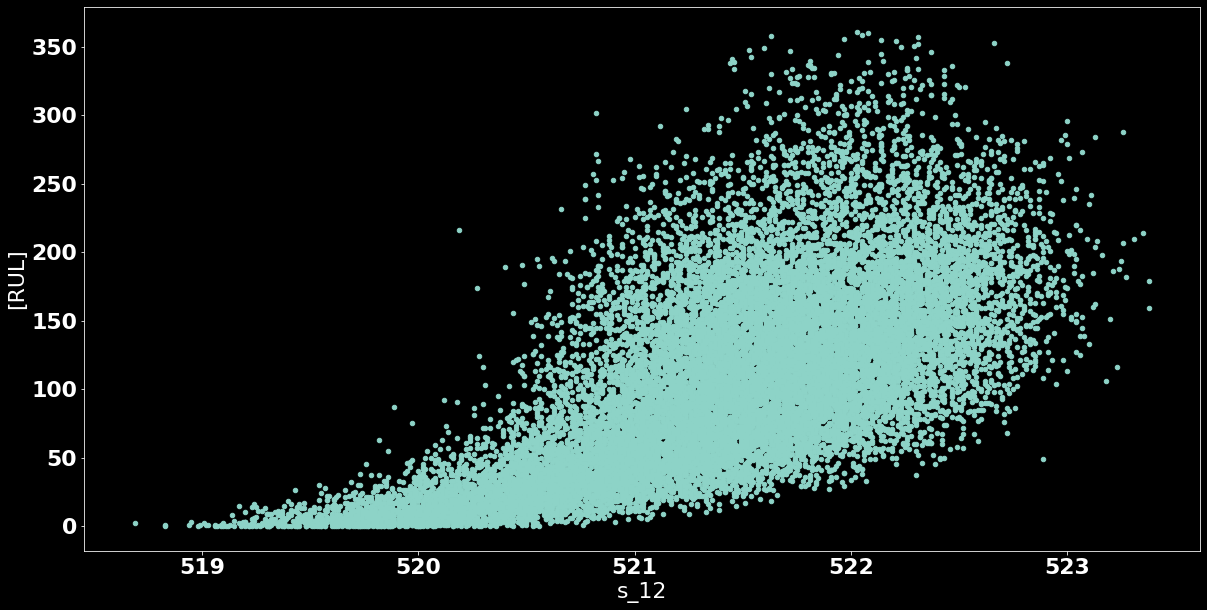

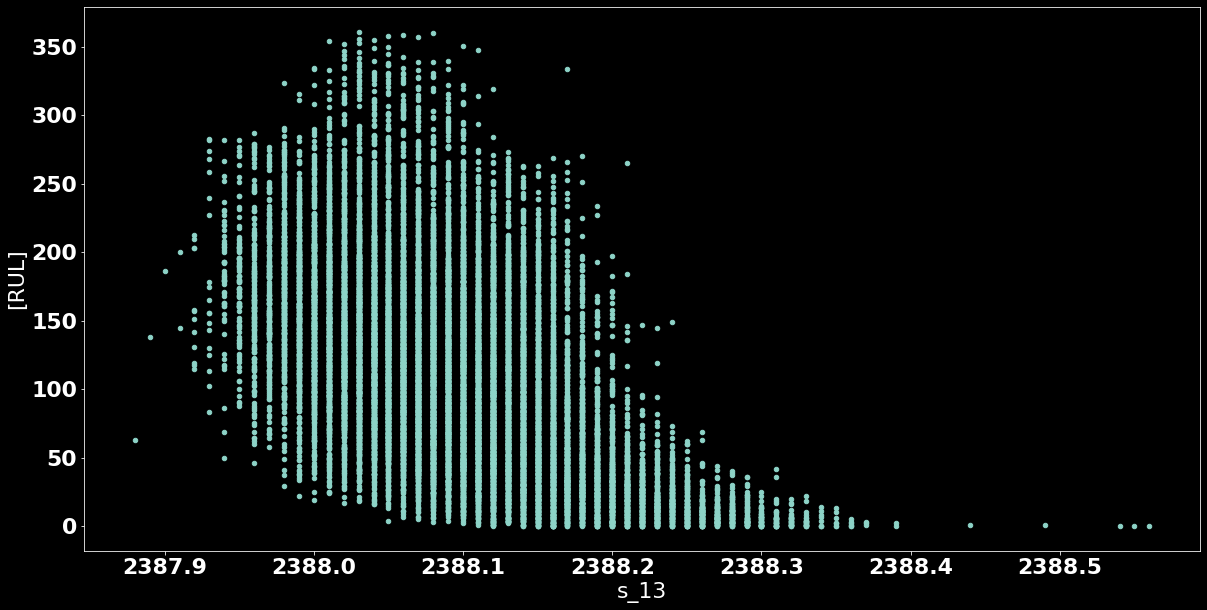

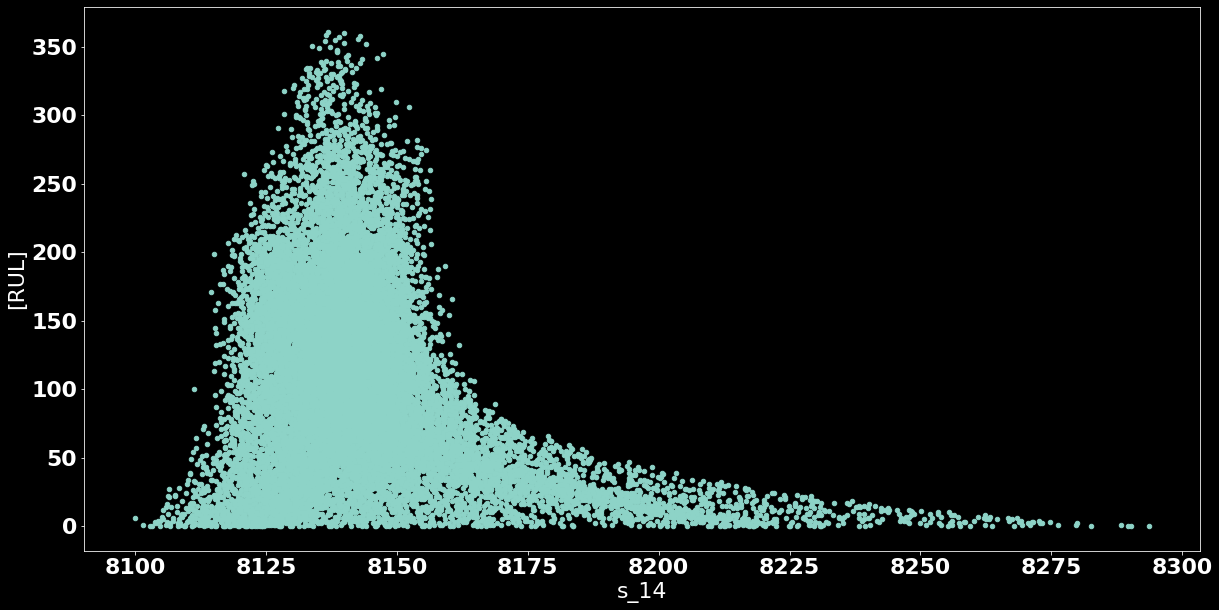

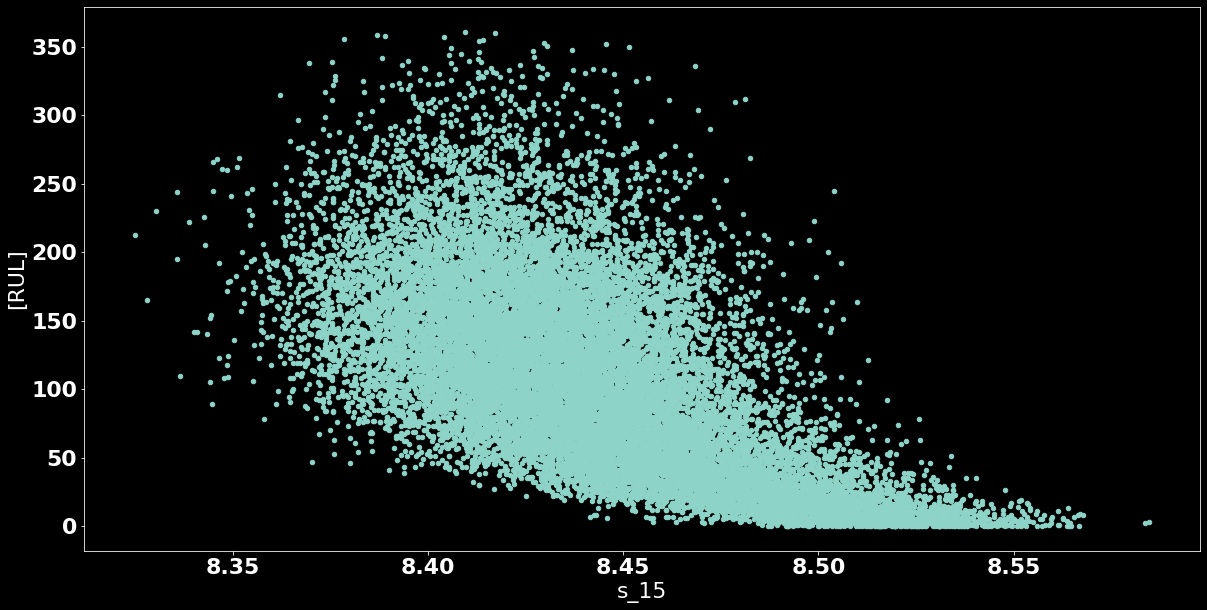

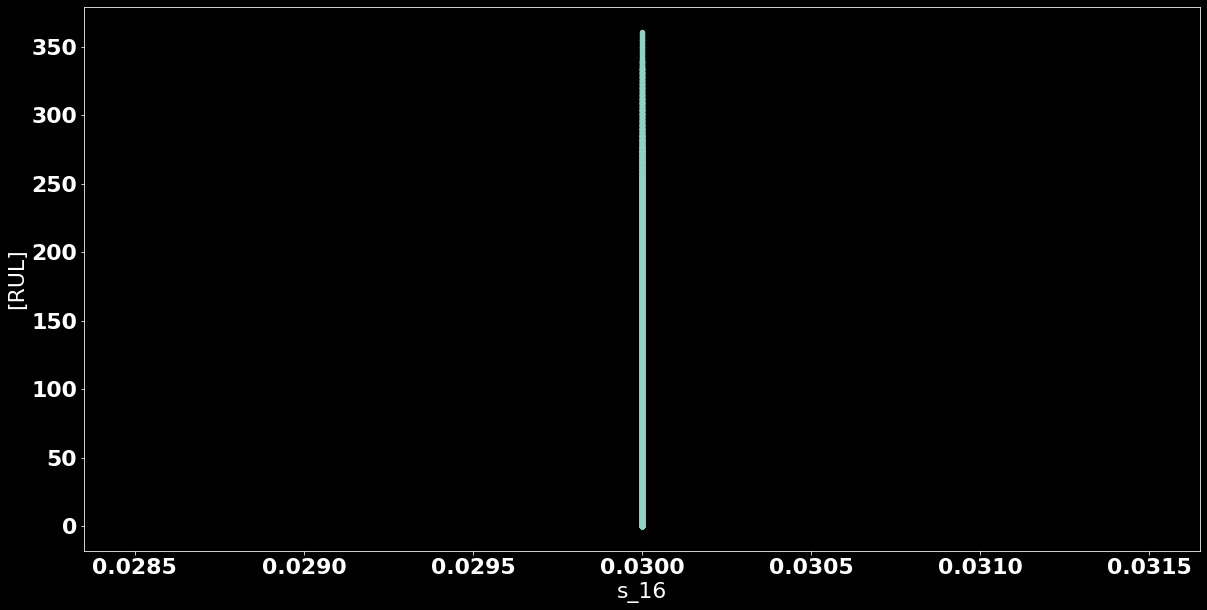

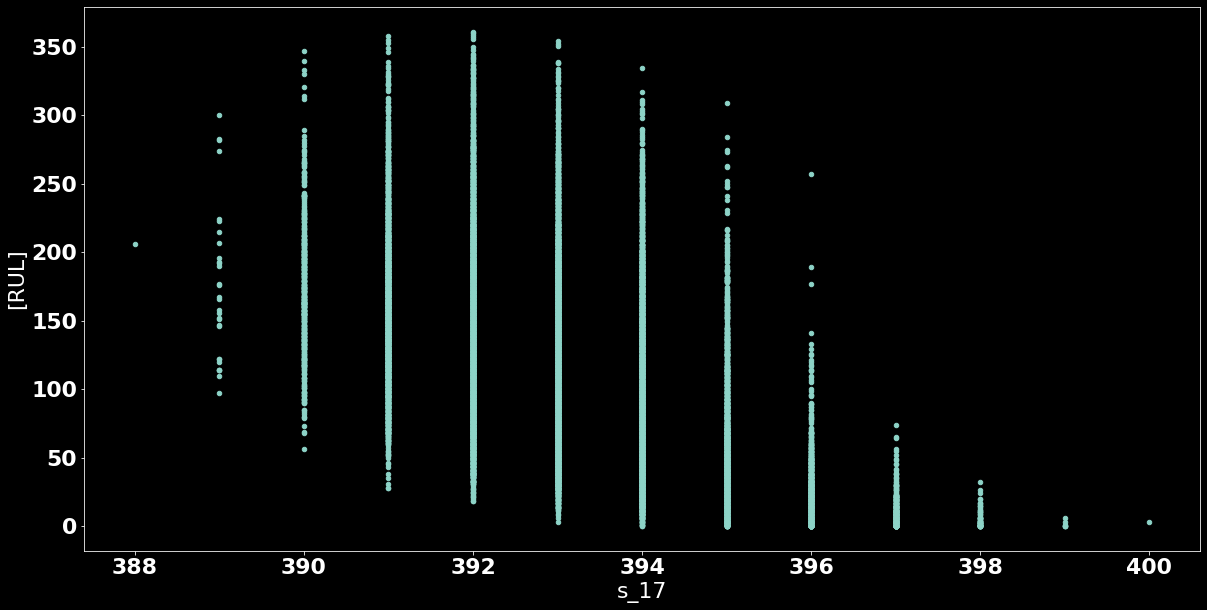

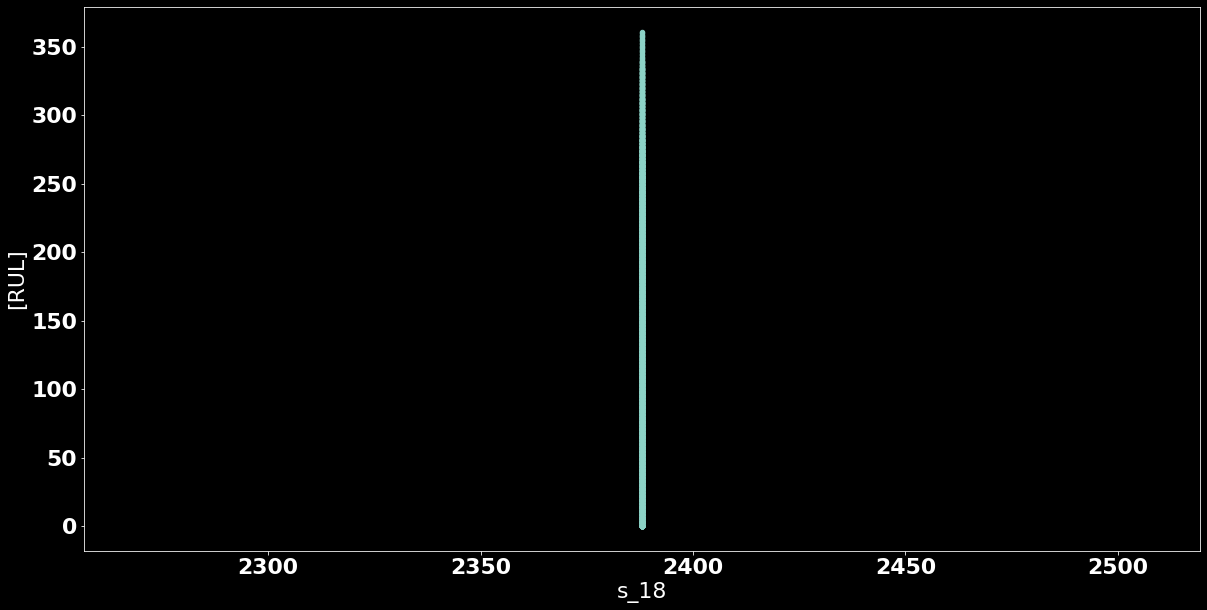

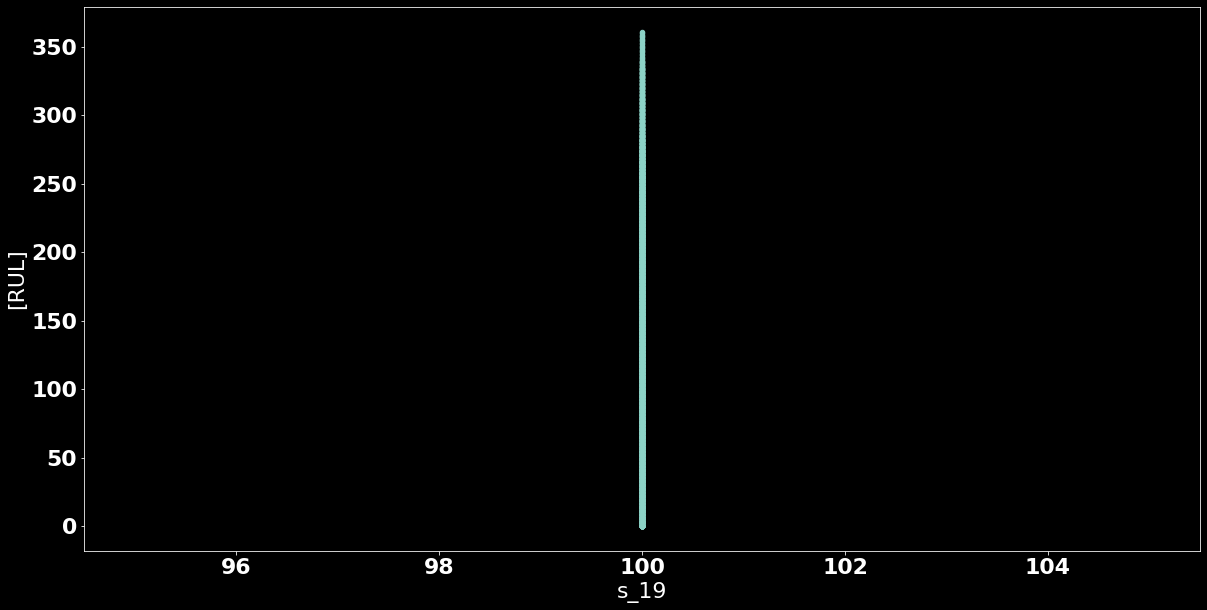

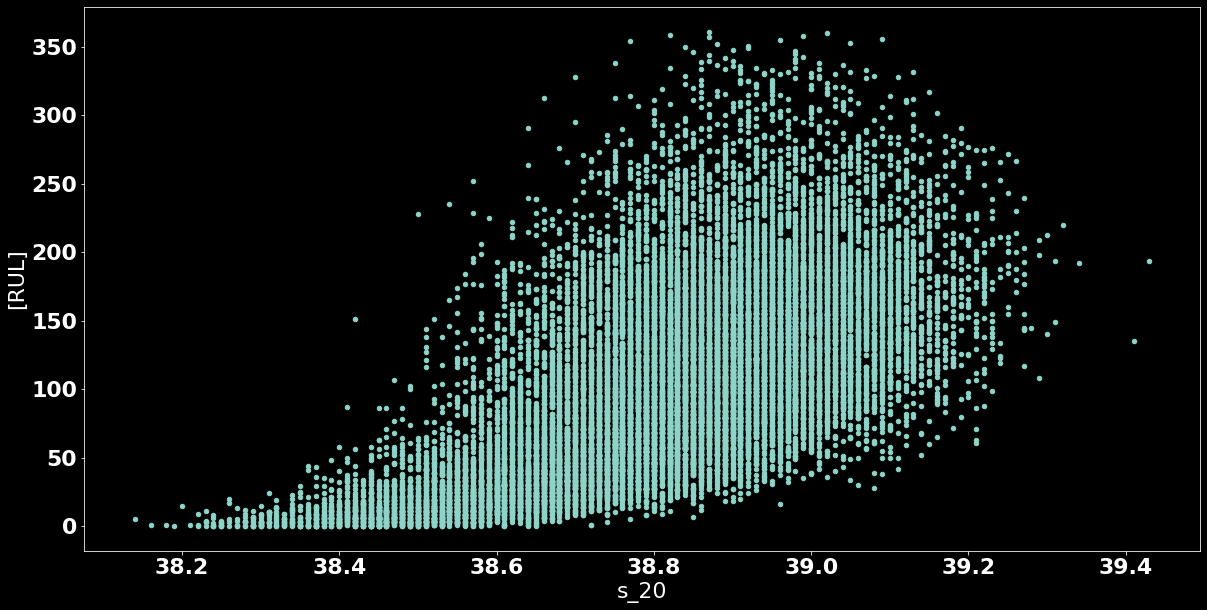

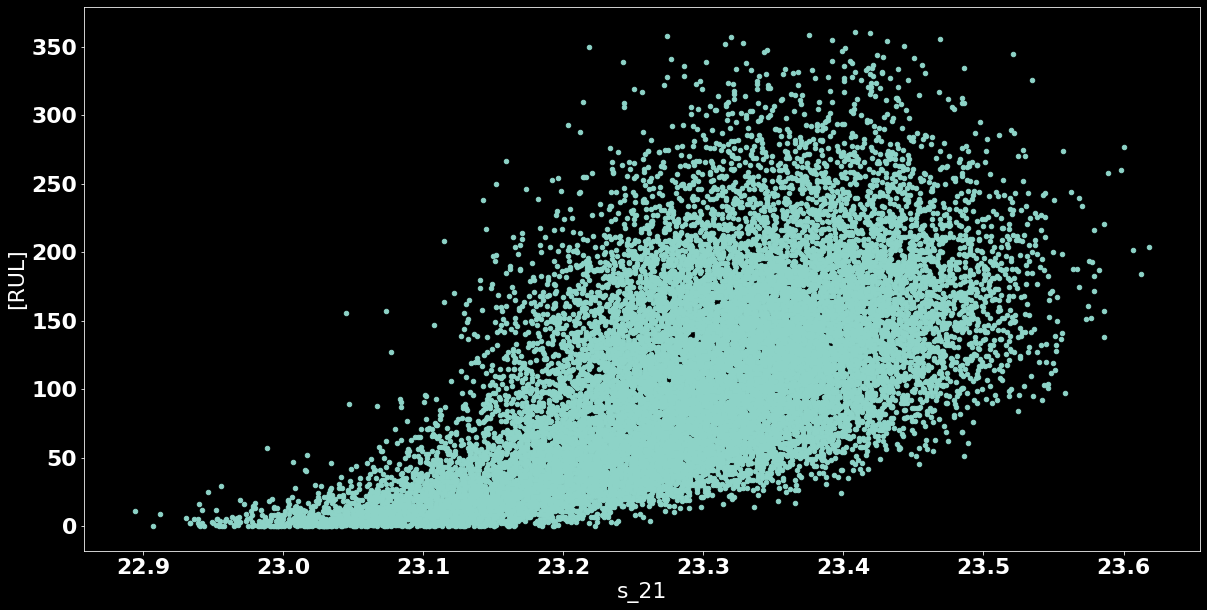

In [44]:
for i in range(21): 
  train.plot(x=sensor_names[i], y=["RUL"], kind="scatter")

In [55]:
new = train.groupby("id").max()

In [58]:
# Minimum RUL from all engines
new["RUL"].describe()

count    100.000000
mean     205.310000
std       46.342749
min      127.000000
25%      176.000000
50%      198.000000
75%      228.250000
max      361.000000
Name: RUL, dtype: float64